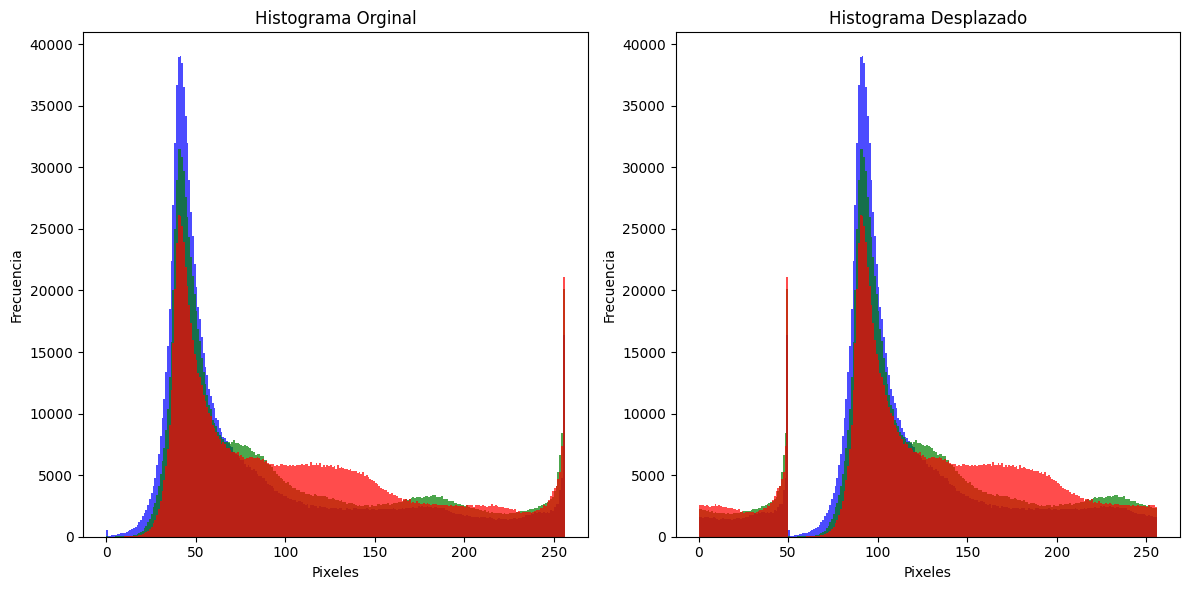

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('iron.jpg')
blue, green, red = cv2.split(imagen)

# Histograma de los canales
bhist_original = cv2.calcHist([blue], [0], None, [256], [0, 256])
ghist_original = cv2.calcHist([green], [0], None, [256], [0, 256])
rhist_original = cv2.calcHist([red], [0], None, [256], [0, 256])

# Aplicar el desplazamiento a los canales
desp = 50
blue_desp = np.clip(blue + desp, 0, 255).astype(np.uint8)
green_desp = np.clip(green + desp, 0, 255).astype(np.uint8)
red_desp = np.clip(red + desp, 0, 255).astype(np.uint8)

# Calculate the histogram of the shifted blue channel
bhist_shifted = cv2.calcHist([blue_desp], [0], None, [256], [0, 256])
ghist_shifted = cv2.calcHist([green_desp], [0], None, [256], [0, 256])
rhist_shifted = cv2.calcHist([red_desp], [0], None, [256], [0, 256])

# Step 5: Merge the color channels back into an image
imagen_desp = cv2.merge([blue_desp, green_desp, red_desp])

# Step 6: Display the original and shifted histograms using Matplotlib with cmap
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Histograma Orginal')
plt.xlabel('Pixeles')
plt.ylabel('Frecuencia')
plt.hist(blue.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.hist(green.ravel(), bins=256, range=[0, 256], color='green', alpha=0.7)
plt.hist(red.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)

plt.subplot(1, 2, 2)
plt.title('Histograma Desplazado')
plt.xlabel('Pixeles')
plt.ylabel('Frecuencia')
plt.hist(blue_desp.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.hist(green_desp.ravel(), bins=256, range=[0, 256], color='green', alpha=0.7)
plt.hist(red_desp.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)

plt.tight_layout()
plt.show()

# Display the original and shifted images (optional)
cv2.imshow('Original', imagen)
cv2.imshow('Desplazada', imagen_desp)
cv2.waitKey(0)
cv2.destroyAllWindows()
